In [9]:
import mnist_reader

X_train, y_train = mnist_reader.load_mnist('../data/fashion/', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

In [10]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 5)
%time neigh.fit(X_train, y_train)

Wall time: 36.2 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
import numpy as np
%time predict = neigh.predict(X_test)
correct = np.sum(predict == y_test)
total = X_test.shape[0]
accuracy = correct/total*100
print(correct)
print(total)
print(accuracy)

Wall time: 15min 40s
8554
10000
85.54


In [4]:
from sklearn.metrics import accuracy_score

In [5]:
print(accuracy_score(y_test,predict))

0.8554


In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[855,   1,  17,  16,   3,   1, 100,   1,   6,   0],
       [  8, 968,   4,  12,   4,   0,   3,   0,   1,   0],
       [ 24,   2, 819,  11,  75,   0,  69,   0,   0,   0],
       [ 41,   8,  15, 860,  39,   0,  34,   0,   3,   0],
       [  2,   1, 126,  26, 773,   0,  71,   0,   1,   0],
       [  1,   0,   0,   0,   0, 822,   5,  96,   1,  75],
       [176,   1, 132,  23,  80,   0, 575,   0,  13,   0],
       [  0,   0,   0,   0,   0,   3,   0, 961,   0,  36],
       [  2,   0,  10,   4,   7,   0,  16,   7, 953,   1],
       [  0,   0,   0,   0,   0,   2,   1,  29,   0, 968]], dtype=int64)

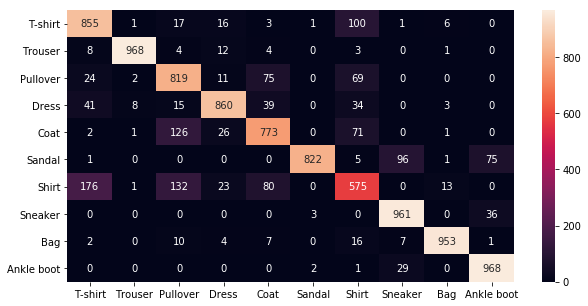

In [8]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, predict)

labels = ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels], dtype='float64')
plt.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.show()